In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
%matplotlib inline

## 1. Data Exploration and Feature Selection

In [27]:
df = pd.read_csv("winequality-red.csv", delimiter=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [28]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [29]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [30]:
corr_matrix = df.corr()
print(corr_matrix)

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

In [34]:
data = df.loc[:, ["fixed acidity", "citric acid", "sulphates", "alcohol", "quality"]]

corr_matrix_data = data.corr()
print(corr_matrix_data)

               fixed acidity  citric acid  sulphates   alcohol   quality
fixed acidity       1.000000     0.671703   0.183006 -0.061668  0.124052
citric acid         0.671703     1.000000   0.312770  0.109903  0.226373
sulphates           0.183006     0.312770   1.000000  0.093595  0.251397
alcohol            -0.061668     0.109903   0.093595  1.000000  0.476166
quality             0.124052     0.226373   0.251397  0.476166  1.000000


In [35]:
data = df.loc[:, ["citric acid", "sulphates", "alcohol", "quality"]]

corr_matrix_data = data.corr()
print(corr_matrix_data)

             citric acid  sulphates   alcohol   quality
citric acid     1.000000   0.312770  0.109903  0.226373
sulphates       0.312770   1.000000  0.093595  0.251397
alcohol         0.109903   0.093595  1.000000  0.476166
quality         0.226373   0.251397  0.476166  1.000000


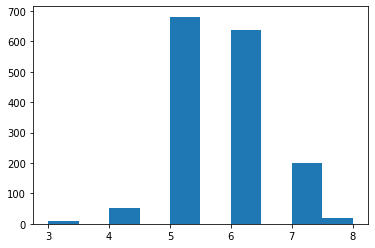

In [36]:
plt.hist(df["quality"])

plt.show()

## 2. Create train/test data sets for hold out validation

In [37]:
x = data.loc[:, ["citric acid", "sulphates", "alcohol"]]
y = data.loc[:, ["quality"]]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.2, random_state=43)

## 3. OLS Regression Model

In [38]:
from sklearn import linear_model

lm = linear_model.LinearRegression()
lm.fit(x_train, y_train)

print("Regression score - training data: ", lm.score(x_train, y_train))
print("Regression score - test data: ", lm.score(x_test, y_test))

Regression score - training data:  0.273606282394265
Regression score - test data:  0.3232583235181129


In [45]:
from sklearn import neighbors

In [53]:
knn_5 = neighbors.KNeighborsRegressor(n_neighbors = 1)
knn_5.fit(x_train, y_train)

print("Train:", knn_5.score(x_train, y_train))
print("Test:", knn_5.score(x_test, y_test))

Train: 0.9764735746186843
Test: -0.04645268889288556


In [54]:
knn_10 = neighbors.KNeighborsRegressor(n_neighbors = 10)
knn_10.fit(x_train, y_train)

print("Train:", knn_10.score(x_train, y_train))
print("Test:", knn_10.score(x_test, y_test))

Train: 0.43349544003060825
Test: 0.31786981474517273


In [55]:
knn_10w = neighbors.KNeighborsRegressor(n_neighbors = 10, weights = "distance")
knn_10w.fit(x_train, y_train)

print("Train:", knn_10w.score(x_train, y_train))
print("Test:", knn_10w.score(x_test, y_test))

Train: 0.9884328408541865
Test: 0.4150481341378429
